### Linear Regression Project for IE (ML 1)

In [1]:
import numpy as np
import pandas as pd
import os
import missingno
import math
import sklearn
from scipy import stats

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.patches as mpatches

# Classifier Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Regression Libraries

from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNetCV, Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest
from sklearn.kernel_ridge import KernelRidge

# Cross Validation
from sklearn.model_selection import (KFold, StratifiedKFold, train_test_split, 
KFold,RepeatedStratifiedKFold,cross_val_score, RandomizedSearchCV, GridSearchCV)

# Evaluation
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,accuracy_score, 
classification_report, confusion_matrix, mean_squared_error, SCORERS)

# Other Libraries
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures, MinMaxScaler
import imblearn
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import collections
from pprint import pprint
import time
import warnings
warnings.filterwarnings('ignore')
GD = False
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
lala

NameError: ignored

In [ ]:
import random
random.seed(10)
print(random.random())

0.5714025946899135


In [ ]:
#raw = pd.read_excel('/kaggle/input/ml-assignment/CustomerDB_assignment_500.xlsx')
raw = pd.read_excel('CustomerDB_assignment_500.xlsx')

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   custid       499 non-null    object 
 1   gender       499 non-null    int64  
 2   age          499 non-null    int64  
 3   ed           499 non-null    int64  
 4   jobcat       499 non-null    int64  
 5   union        499 non-null    int64  
 6   employ       499 non-null    int64  
 7   retire       499 non-null    int64  
 8   incom        499 non-null    int64  
 9   debtinc      499 non-null    float64
 10  creddebt     499 non-null    float64
 11  default      499 non-null    int64  
 12  jobsat       499 non-null    int64  
 13  marital      499 non-null    int64  
 14  reside       499 non-null    int64  
 15  pets         499 non-null    int64  
 16  homeown      499 non-null    int64  
 17  address      499 non-null    int64  
 18  cars         499 non-null    int64  
 19  carbuy  

<AxesSubplot:>

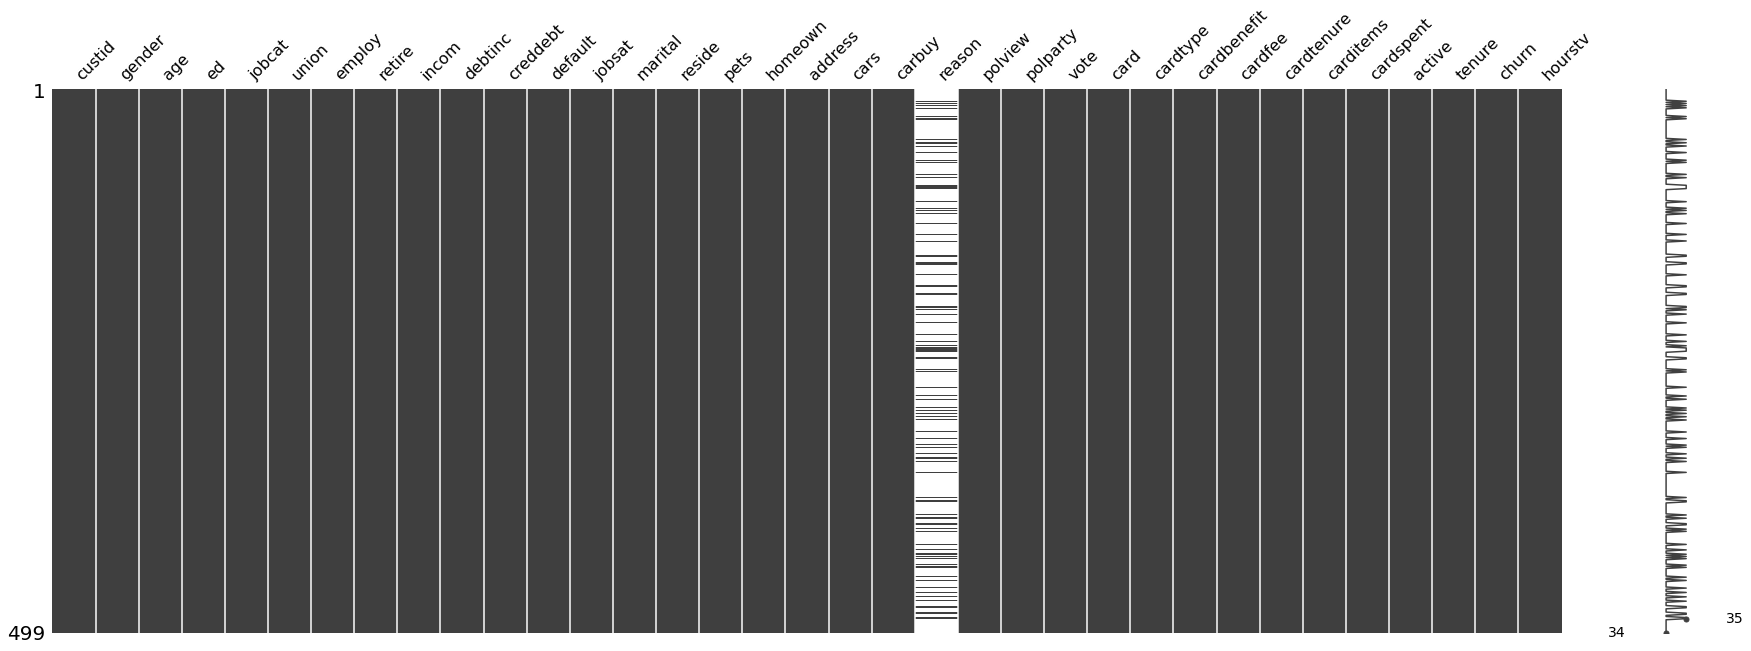

In [ ]:
# Plot graphic of missing values
missingno.matrix(raw, figsize = (30,10))

In [ ]:
# missing too many values, cannot impute
to_drop = ['reason']
raw = raw.drop(to_drop, axis=1)

In [ ]:
raw.head()

,custid,gender,age,ed,jobcat,union,employ,retire,incom,debtinc,creddebt,default,jobsat,marital,reside,pets,homeown,address,cars,carbuy,polview,polparty,vote,card,cardtype,cardbenefit,cardfee,cardtenure,carditems,cardspent,active,tenure,churn,hourstv
0,1071-IRJZAI-Z7U,0,50,21,1,0,7,0,90,8.6,3.568140,0,4,1,2,0,1,24,0,0,4,0,1,1,1,4,0,26,12,651.05,1,53,0,17
1,7180-SGFDZT-VUS,0,47,11,1,0,10,0,32,1.3,0.177216,0,3,0,1,1,0,13,1,0,3,0,1,5,3,3,0,19,3,52.10,1,46,0,20
2,9716-WKBJBO-YPB,1,43,14,5,0,9,0,41,20.5,4.900115,1,5,0,1,4,0,8,4,1,1,1,0,1,1,1,0,5,14,386.77,1,12,0,23
3,9309-TCQCUO-K1U,0,37,12,2,0,2,0,40,7.5,0.447000,0,2,0,1,1,0,14,3,0,4,0,0,1,3,3,1,2,9,178.61,0,4,1,21
4,6731-UKEQRV-6ZB,1,44,11,6,1,15,0,67,1.5,0.188940,0,3,1,4,7,0,14,5,1,6,0,1,2,2,1,0,26,13,894.94,0,68,0,17


## Split between test and train sets

In [ ]:
df_train, df_test = train_test_split(raw, train_size=400, test_size=99)

In [ ]:
df_train["row_id"] = df_train.index + 1

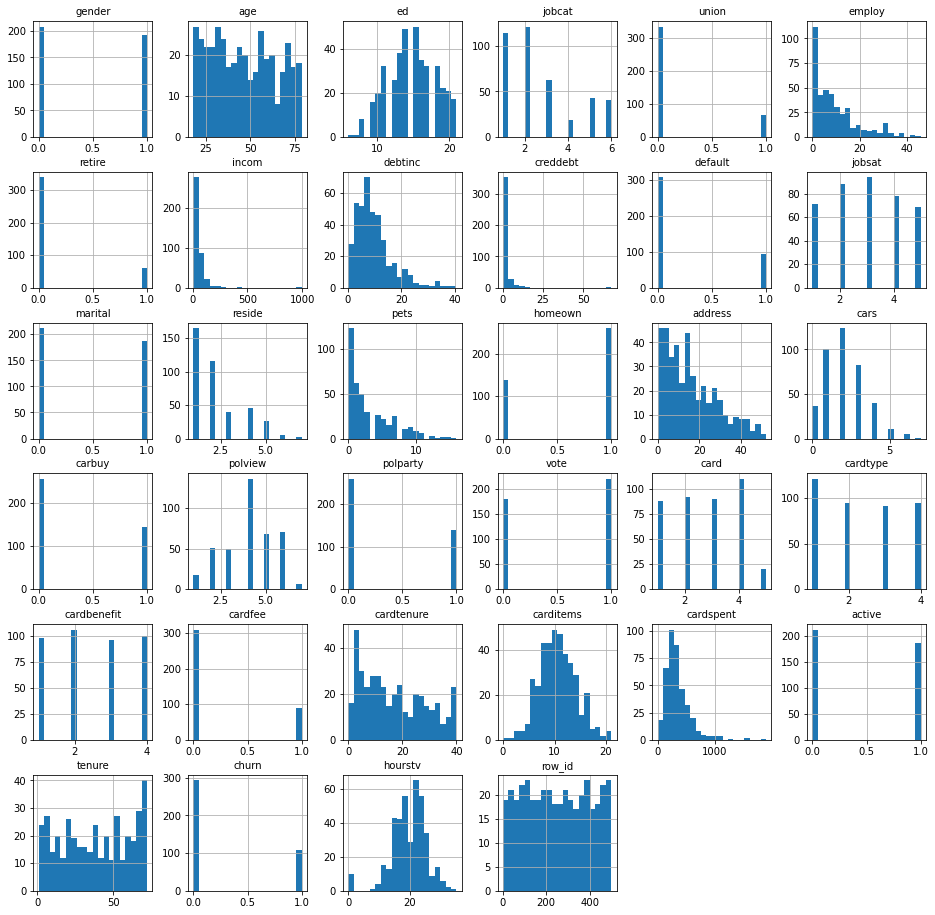

In [ ]:
attribute_columns = list(df_train.columns)
fontsize = 10
fig = df_train[attribute_columns].hist(bins = 20, figsize = (16,16),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
for x in fig.ravel():
    x.title.set_size(fontsize)
    
plt.show()

In [ ]:
numerical_columns = df_train.loc[:, ~df_train.columns.isin(['gender','union','retire','default','marital',
        'homeown','carbuy','polparty','vote','cardfee','active','churn'])].select_dtypes(include=['int64', 'float64']).columns


In [ ]:
df_num = df_train[numerical_columns]

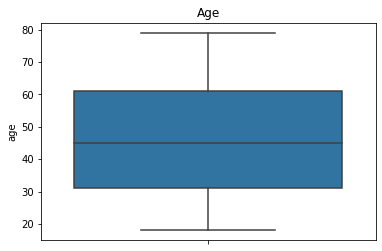

In [ ]:
plt.figure()
sns.boxplot(y = df_train['age'])
plt.title('Age')
plt.show()

In [ ]:
def plot_boxplot(df):
    plt.figure(figsize=(12,12*4))
    count = 1
    for x in list(numerical_columns):
        plt.subplot(11,2,count)
        sns.boxplot(y = df[x])
        plt.title('{}'.format(x))
        count = count + 1
    plt.show()


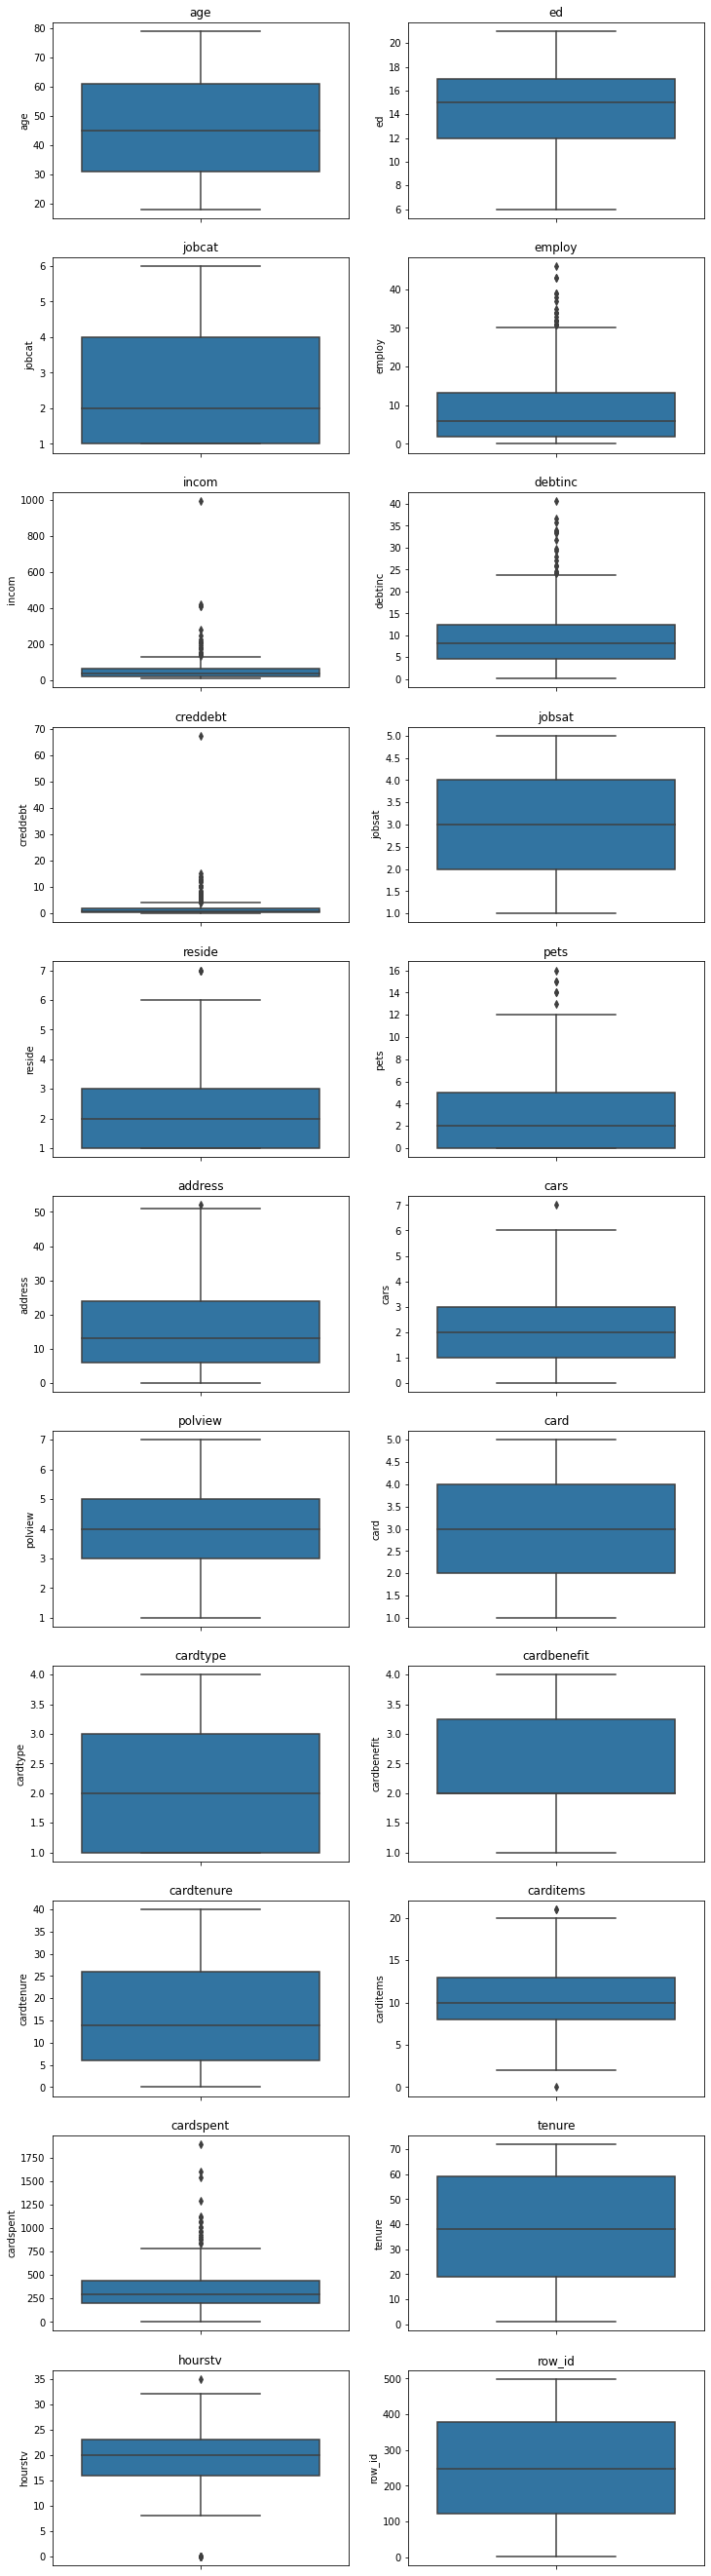

In [ ]:
plot_boxplot(df_num)

In [ ]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))
    print('variable name: {}'.format(variable))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

variable name: age


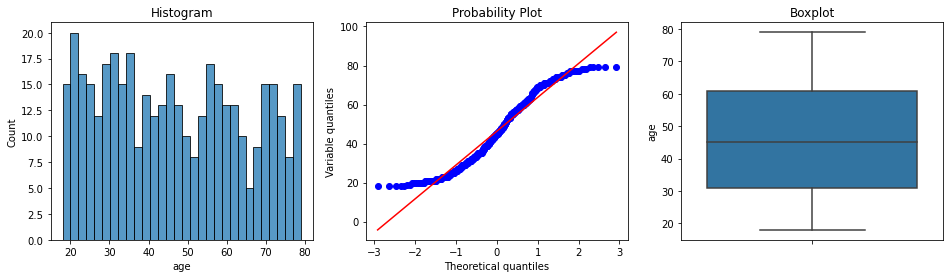

variable name: ed


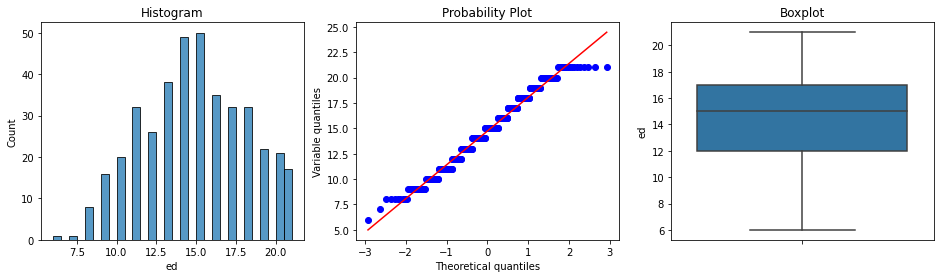

variable name: jobcat


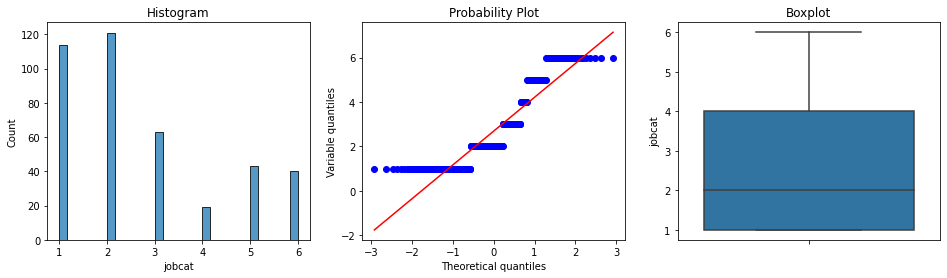

variable name: employ


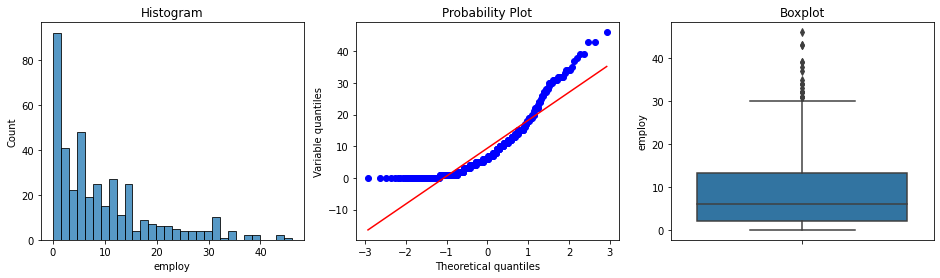

variable name: incom


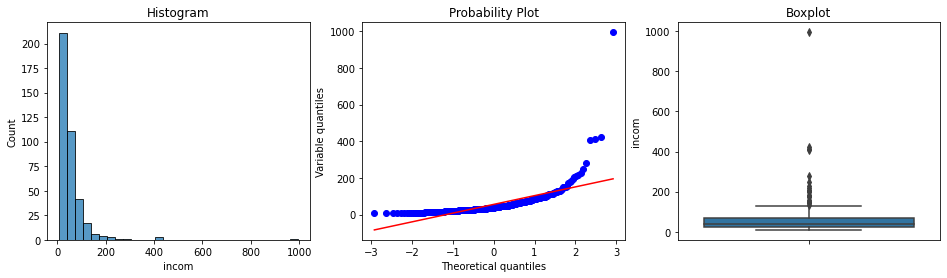

variable name: debtinc


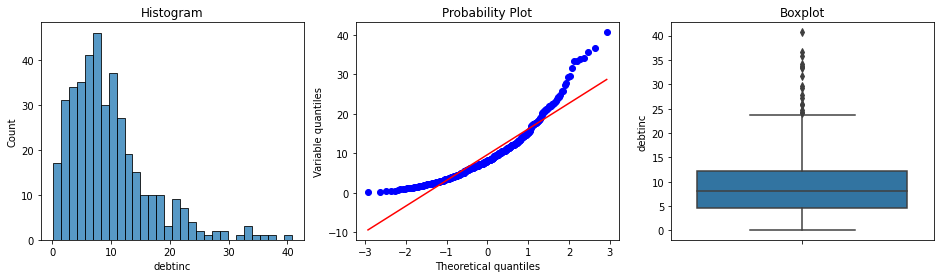

variable name: creddebt


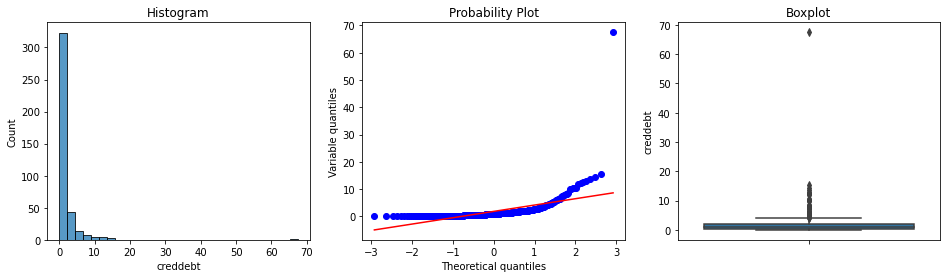

variable name: jobsat


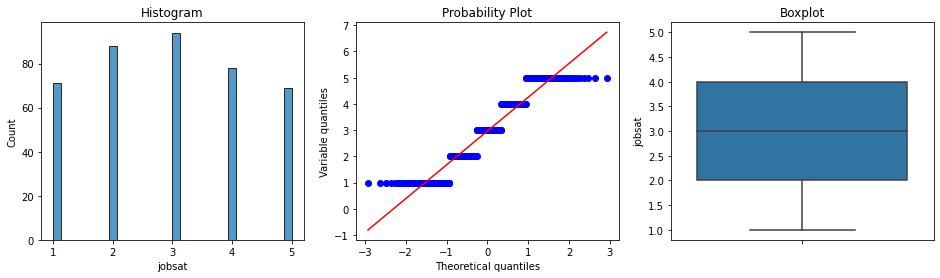

variable name: reside


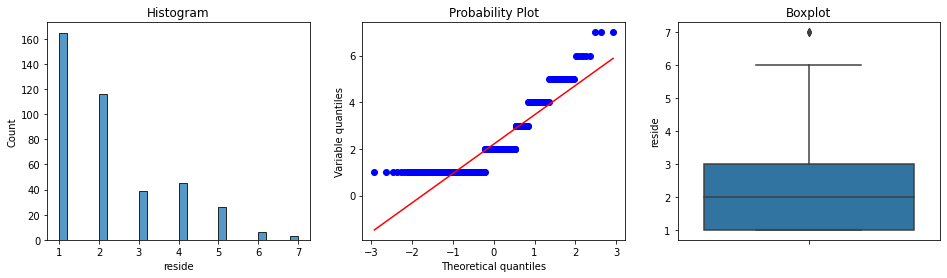

variable name: pets


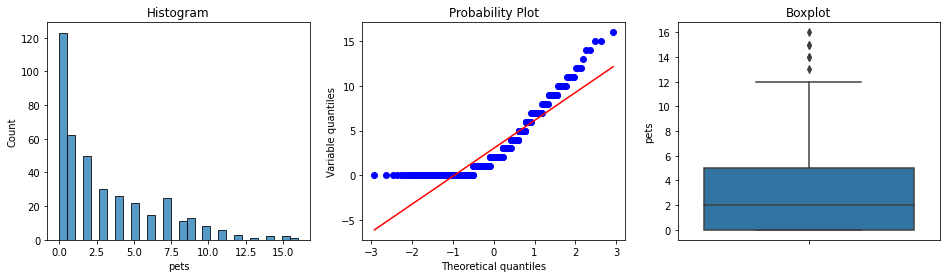

variable name: address


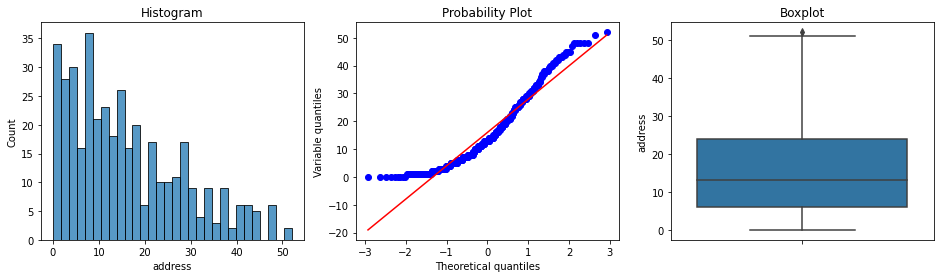

variable name: cars


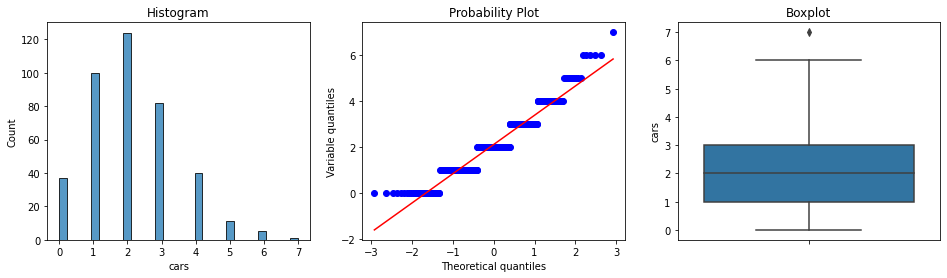

variable name: polview


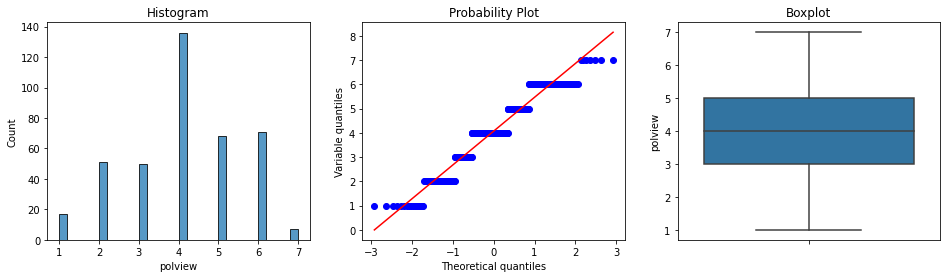

variable name: card


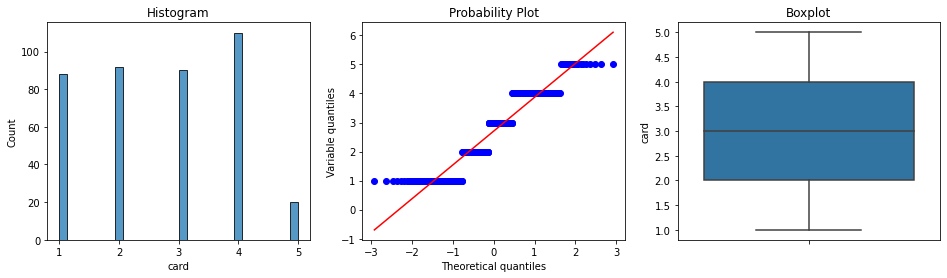

variable name: cardtype


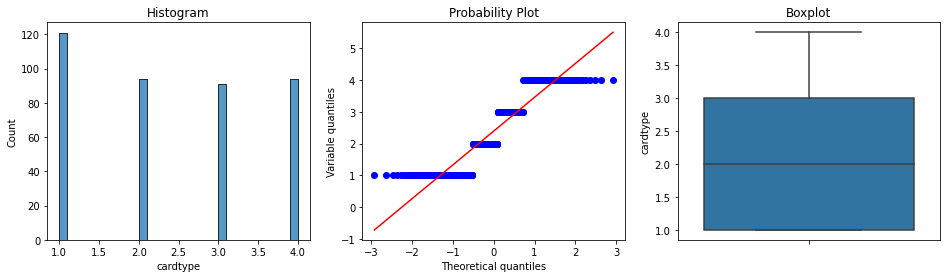

variable name: cardbenefit


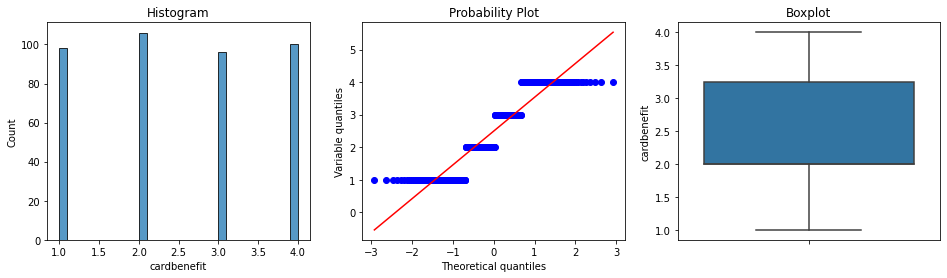

variable name: cardtenure


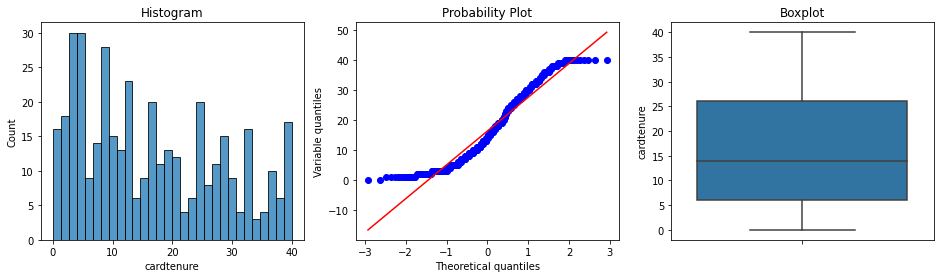

variable name: carditems


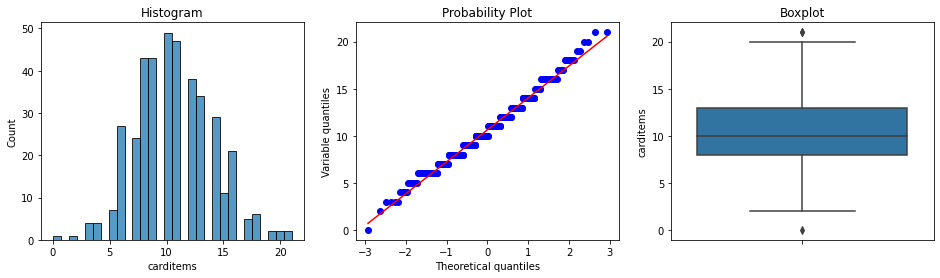

variable name: cardspent


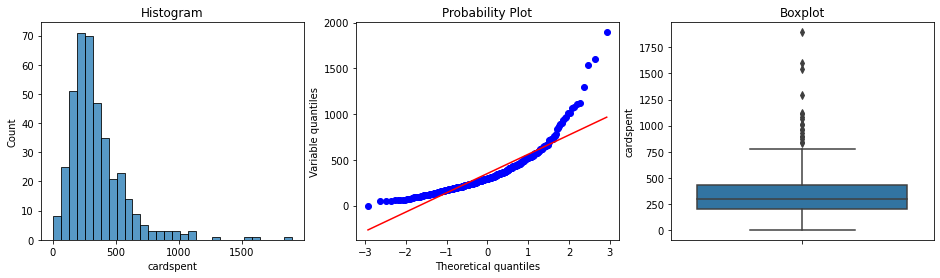

variable name: tenure


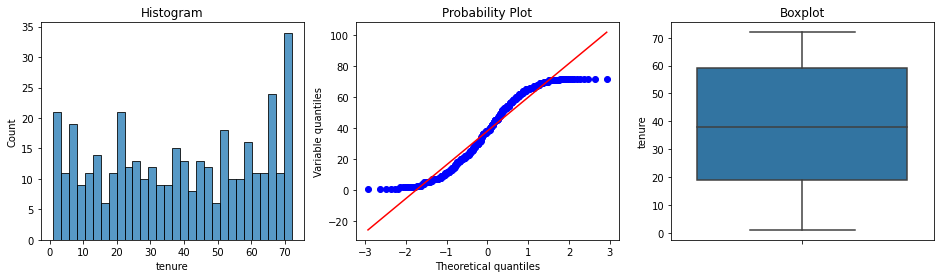

variable name: hourstv


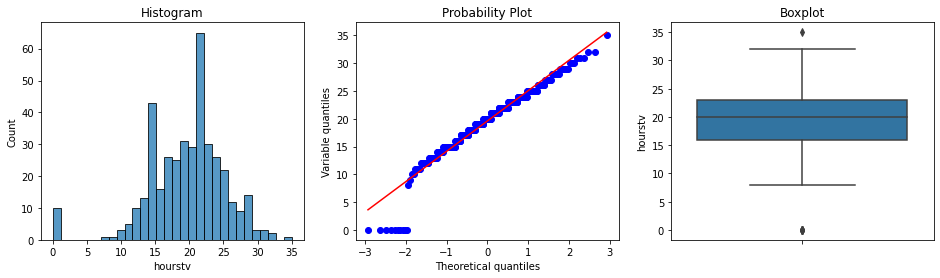

variable name: row_id


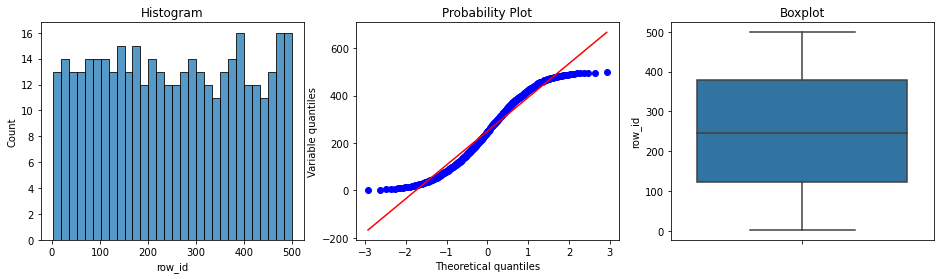

In [ ]:
for i in numerical_columns:
    diagnostic_plots(df_train, i)


## Remove Outliers
#### (only extreme, depending on the case, we want to avoid reducing the dataset massively as we only have 400 observations)

In [ ]:
df_num.columns

Index(['age', 'ed', 'jobcat', 'employ', 'incom', 'debtinc', 'creddebt',
       'jobsat', 'reside', 'pets', 'address', 'cars', 'polview', 'card',
       'cardtype', 'cardbenefit', 'cardtenure', 'carditems', 'cardspent',
       'tenure', 'hourstv', 'row_id'],
      dtype='object')

In [ ]:
def find_skewed_boundaries(df, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.
    columns_to_trim = []
    
    columns = df.columns
    
    for i in list(columns):
        
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)

        lower_boundary = df[i].quantile(0.25) - (IQR * distance)
        upper_boundary = df[i].quantile(0.75) + (IQR * distance)

        #return upper_boundary, lower_boundary
        if any(np.where(df[i] > upper_boundary, True, False)) | any(np.where(df[i] < lower_boundary, True, False)) == True:
        #if any(np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))) == True:
            columns_to_trim.append(i)
            df_trimmed = df[~((df[i] < lower_boundary)|(df[i] > upper_boundary))]
        else:
            continue
        
        
    print ('cols to trim >> {}'.format(columns_to_trim))    
    print ('\n')
    print('previous shape {}  ----  after transformation {}'.format(df.shape, df_trimmed.shape))
    return df_trimmed
                                                    

In [ ]:
df_trimmed = find_skewed_boundaries(df_num, 3)

cols to trim >> ['incom', 'debtinc', 'creddebt', 'cardspent']


previous shape (400, 22)  ----  after transformation (396, 22)


In [ ]:
df_trimmed.head()

,age,ed,jobcat,employ,incom,debtinc,creddebt,jobsat,reside,pets,address,cars,polview,card,cardtype,cardbenefit,cardtenure,carditems,cardspent,tenure,hourstv,row_id
437,67,8,5,30,92,6.8,1.795472,4,1,1,33,1,2,2,2,2,33,11,185.80,65,18,438
239,71,16,5,39,209,1.1,0.919600,3,1,1,27,1,5,3,4,1,39,6,692.55,72,22,240
118,49,14,1,14,181,7.8,2.329470,3,1,7,22,2,6,2,2,4,26,6,117.01,62,17,119
54,44,14,5,10,126,1.6,0.677376,3,1,0,5,5,6,4,4,4,15,11,253.95,38,16,55
233,62,17,1,10,89,2.9,0.895607,3,1,9,38,4,6,2,1,1,29,10,150.29,65,32,234


In [ ]:
numerical_columns = numerical_columns.drop('row_id')

In [ ]:
df_train = df_train.iloc[:,~df_train.columns.isin(numerical_columns)]

In [ ]:
df_train

,custid,gender,union,retire,default,marital,homeown,carbuy,polparty,vote,cardfee,active,churn,row_id
437,3902-BESDFP-CX1,1,0,0,0,0,0,1,0,1,0,1,0,438
239,5570-UBZQVB-V31,1,0,0,0,0,0,0,0,0,0,0,0,240
118,6334-TMKRLS-3XA,1,0,0,1,0,1,1,0,0,0,0,0,119
54,0534-NFJPXV-3FI,0,0,0,0,0,1,0,1,1,0,1,1,55
233,6992-HBGDTB-F1F,1,0,0,0,0,1,0,0,0,0,0,0,234
435,2794-GBOANT-LQM,0,0,0,0,0,1,0,1,0,0,1,0,436
296,6260-QQNXVJ-8B8,0,0,0,0,1,1,0,0,1,0,0,0,297
73,5962-DYQMXZ-AVV,0,1,0,0,1,1,0,0,0,1,1,0,74
493,4379-AXDMBJ-ZW4,1,0,0,1,1,1,0,0,1,0,1,1,494
395,6402-LYZTIX-01O,1,0,0,1,1,1,1,0,1,0,0,1,396


In [ ]:
df_train_merged = pd.merge(df_trimmed,df_train, left_on='row_id', right_on='row_id', how='left').drop('row_id', axis = 1)

In [ ]:
df_train_merged.shape

(396, 34)

### split train set between dependent and independent 

In [ ]:
df_train = df_train_merged.copy()

In [ ]:
X = df_train.loc[:, df_train.columns != 'incom']
y = df_train.loc[:, df_train.columns == 'incom']

df_train_ID = df_train.custid
df_test_ID = df_test.custid

X = X.loc[:, X.columns != 'custid']

In [ ]:
X.columns

Index(['age', 'ed', 'jobcat', 'employ', 'debtinc', 'creddebt', 'jobsat',
       'reside', 'pets', 'address', 'cars', 'polview', 'card', 'cardtype',
       'cardbenefit', 'cardtenure', 'carditems', 'cardspent', 'tenure',
       'hourstv', 'gender', 'union', 'retire', 'default', 'marital', 'homeown',
       'carbuy', 'polparty', 'vote', 'cardfee', 'active', 'churn'],
      dtype='object')

### Remember
#### categorical coded 0,1 >> gender, union, retire, default, marital, homeown, carbuy, polaprty, vote, cardfee, active, churn

#### discrete >> jobcat, jobsat, cars, polview, card, cardtype, cardbenefit

#### continuous >> age, ed, employ, debtinc, reside, pets, address,cardtenure, tenure,cardspent, creddebt, carditems,hourstv



In [ ]:
categ_cols = ['gender','union', 'retire', 'default', 'marital', 'homeown', 'carbuy', 'polparty', 'vote', 'cardfee', 'active', 'churn']
ordinal_cols = ['jobcat', 'jobsat', 'cars', 'polview', 'card', 'cardtype', 'cardbenefit']
continuous_cols = ['age','ed', 'employ', 'debtinc', 'reside', 'pets', 'address','cardtenure', 'tenure','cardspent', 'creddebt','carditems','hourstv']

#### Check data skewness

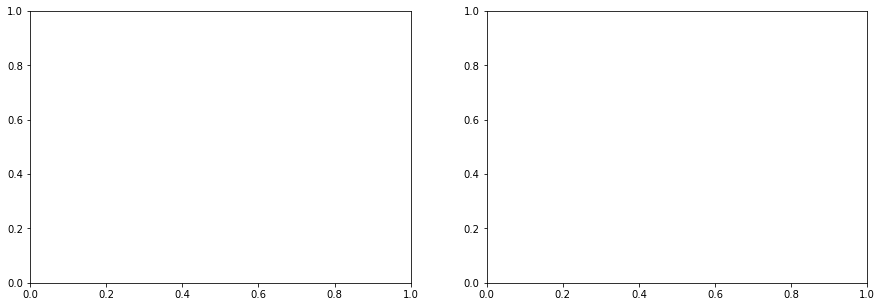

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

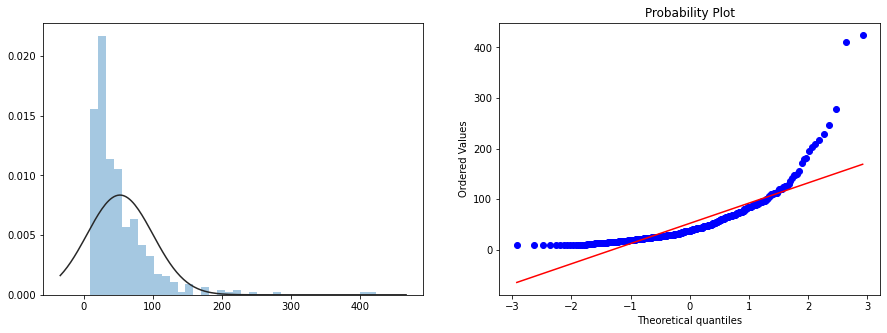

Fisher-Pearson coeficient of skewness: 3.46


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde = False)
stats.probplot(y.incom,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.incom.values):.2f}')

#### any skewness higher than 0.5 will be transformed

In [ ]:
numerical_columns = X.loc[:,X.columns.isin(['age','ed', 'employ', 'debtinc', 'reside', 'pets', 'address','cardtenure', 'tenure','cardspent', 'creddebt','carditems','hourstv'])].select_dtypes(include=['int', 'float']).columns
sk = X[numerical_columns].apply(lambda x: stats.skew(x.dropna())).to_frame('Fisher-Pearson Coef')
skw_cols = list(sk[abs(sk['Fisher-Pearson Coef']) > 0.5].index)
sk[abs(sk['Fisher-Pearson Coef']) > 0.5]

,Fisher-Pearson Coef
debtinc,1.475746
creddebt,3.154324
cardspent,1.386012


#### apply logarithm to both X and Y!

In [ ]:
lmbda = 0.0
X[skw_cols] = X[numerical_columns].loc[:, X[numerical_columns].columns.isin(skw_cols)].apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [ ]:
y = y.apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [ ]:
# removed skewness, before and after
sk['Fisher-Pearson Coef (After)'] = X[numerical_columns].apply(lambda x: stats.skew(x))
sk[sk.index.isin(skw_cols)]

,Fisher-Pearson Coef,Fisher-Pearson Coef (After)
debtinc,1.475746,-0.340190
creddebt,3.154324,1.264226
cardspent,1.386012,-1.878864


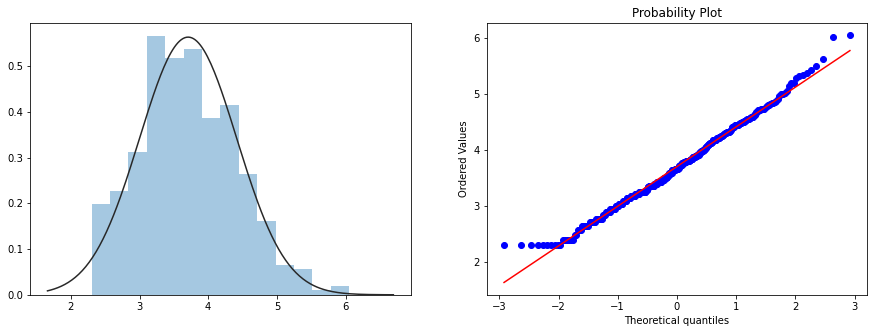

Fisher-Pearson coeficient of skewness: 0.29


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(y, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(y.incom,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(y.incom.values):,.2f}')

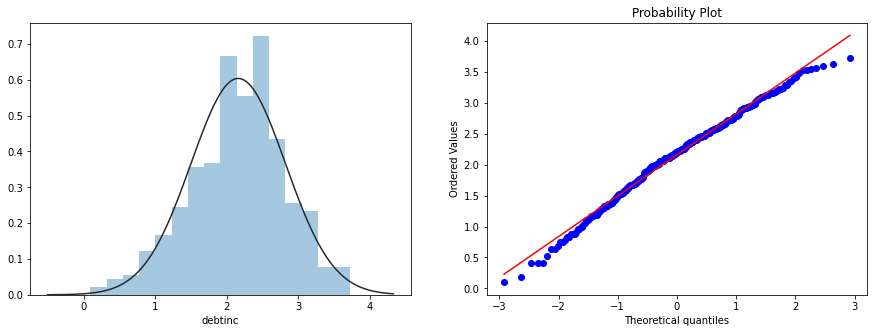

Fisher-Pearson coeficient of skewness: -0.34


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.distplot(X.debtinc, fit=stats.norm, ax=ax[0], kde=False)
stats.probplot(X.debtinc,  plot=ax[1])
plt.show()
print(f'Fisher-Pearson coeficient of skewness: {stats.skew(X.debtinc.values):,.2f}')

#### selecting features and checking correlation

#### numerical cols

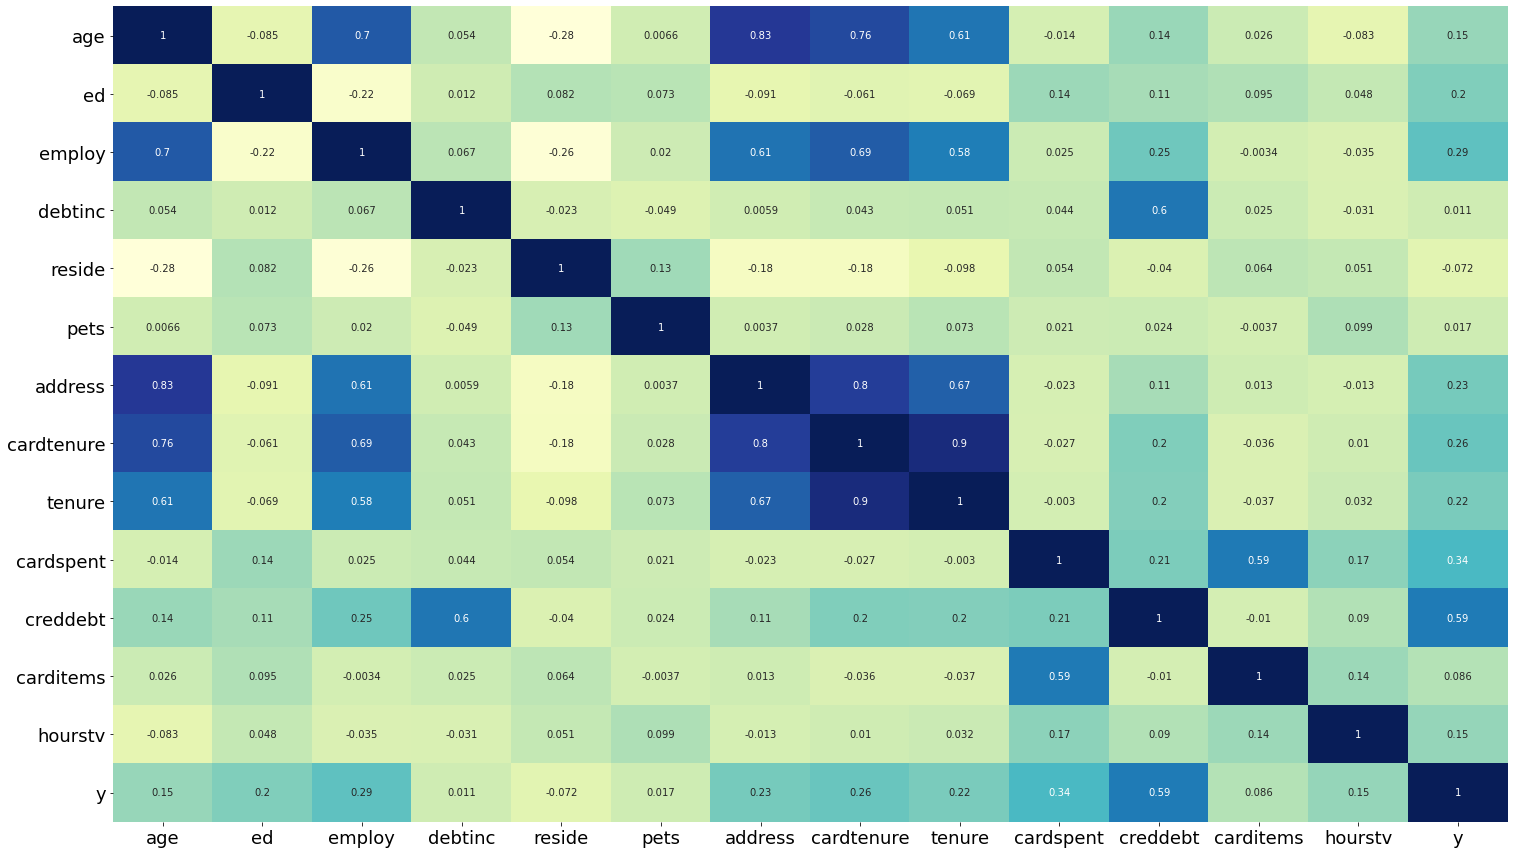

In [ ]:
X_corr = X[continous_cols]
X_corr['y'] = y

_, ax = plt.subplots(figsize=(25,15))
ax.tick_params(axis='both',  labelsize=18)
sns.heatmap(X_corr.corr(), annot=True, cbar=False, cmap='YlGnBu')
plt.show()

#### filter cols that have a correlation with y higher than 0.25

In [ ]:
mask = (abs(X_corr.corr()['y'] >= 0.25))
corr_variables = X_corr.corr()['y'][mask]
corr_variables = list(corr_variables[corr_variables.index != 'y'].index)

corr_variables

['employ', 'cardtenure', 'cardspent', 'creddebt']

#### remove independent variables that have high colinearity > 0.75

In [ ]:
mask = ((abs(X_corr.loc[:, continuous_cols].corr()) > 0.75) & 
        (X_corr.loc[:, continuous_cols].corr() != 1.0))
cols = list(X_corr.loc[:, continuous_cols].corr()[mask].dropna(how='all', axis=1).columns)
to_remove = []
for i in range(0,len(cols)):
    to_remove.append(cols[i])
print('to_remove {}'.format(to_remove))    

continuous_features = list(set(continuous_cols) - set(to_remove))
print('to_keep {}'.format(continuous_features)) 


to_remove ['age', 'address', 'cardtenure', 'tenure']
to_keep ['carditems', 'employ', 'hourstv', 'cardspent', 'pets', 'debtinc', 'creddebt', 'ed', 'reside']


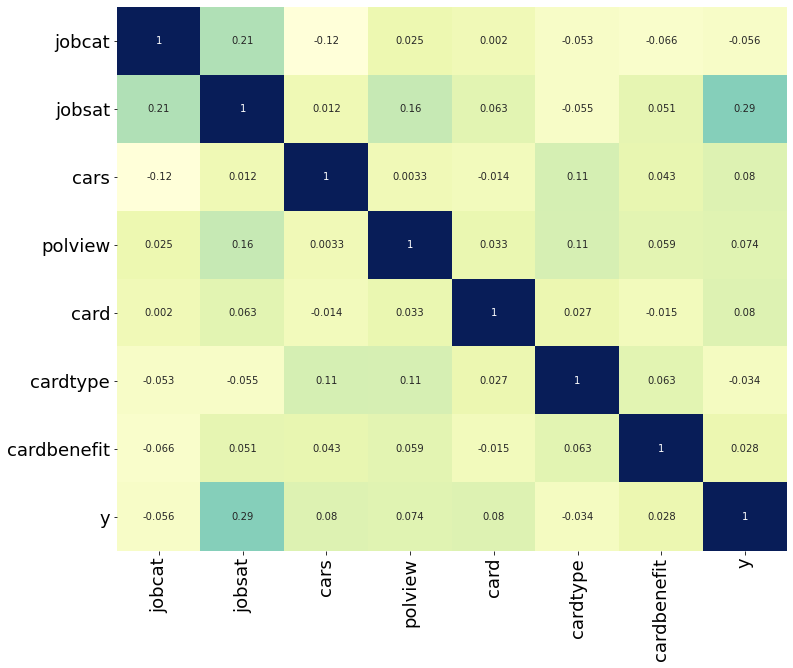

In [ ]:
X_corr_sp = X[ordinal_cols]
X_corr_sp['y'] = y

corr_spearman = X_corr_sp.corr(method = 'spearman')

_, ax = plt.subplots(figsize=(12,10))
ax.tick_params(axis='both',  labelsize=18)
sns.heatmap(corr_spearman, annot=True, cbar=False, cmap='YlGnBu')
plt.show()


In [ ]:
mask = (((abs(X_corr_sp.corr('spearman')['y']) >= 0.1) &
       (X_corr_sp.corr('spearman')['y'] != 1.0)))
X_discrete_cols = list(X_corr_sp.corr('spearman')['y'][mask].index)
discrete_features = list(set(X_discrete_cols))
discrete_features

['jobsat']

In [ ]:
X_num = X.loc[:, X.columns.isin(continuous_features + discrete_features)]
X_num['y'] = y

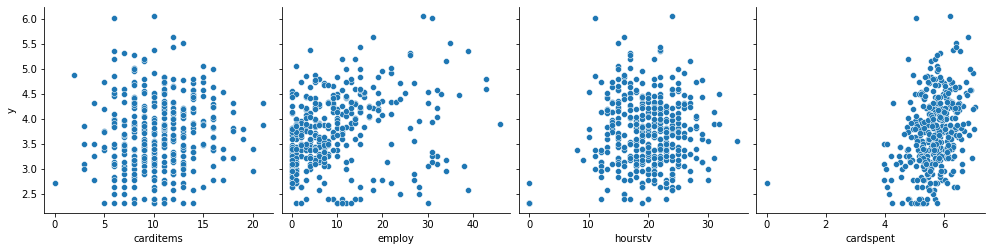

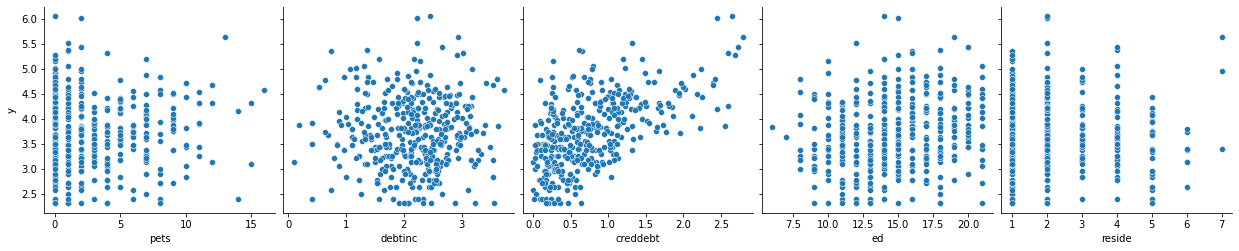

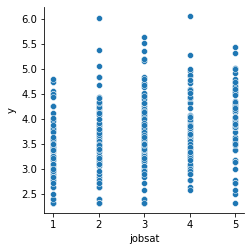

In [ ]:
sns.pairplot(x_vars=continuous_features[:int(len(continuous_features)/2)],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=continuous_features[int(len(continuous_features)/2):],
             y_vars=['y'],
            data=X_num,
            height=3.5)

sns.pairplot(x_vars=discrete_features,
             y_vars=['y'],
            data=X_num,
            height=3.5)

plt.show()

# Training and testing!

In [ ]:
#concat = ['age', 'address', 'cardtenure', 'tenure']
concat = ['age', 'cardtenure']
continuous_features = continuous_features + concat

continuous_features = list(dict.fromkeys(continuous_features))

In [ ]:
continuous_features

['carditems',
 'employ',
 'hourstv',
 'cardspent',
 'pets',
 'debtinc',
 'creddebt',
 'ed',
 'reside',
 'age',
 'cardtenure']

In [ ]:
# X, include only the filtered columns
features = continuous_features + discrete_features + categ_cols
features = list(dict.fromkeys(features))


In [ ]:
X_train = X[features]
y_train = y

In [ ]:
#for text, split between x and y
X_test = df_test.loc[:, df_test.columns != 'incom']
y_test = df_test.loc[:, df_test.columns == 'incom']


In [ ]:
#let's copy X_train so we can reset and remove variables easily
X_train_backup = X_train.copy()

In [ ]:
X_train.head()

,carditems,employ,hourstv,cardspent,pets,debtinc,creddebt,ed,reside,age,cardtenure,jobsat,gender,union,retire,default,marital,homeown,carbuy,polparty,vote,cardfee,active,churn
0,11,30,18,5.230039,1,2.054124,1.028001,8,1,67,33,4,1,0,0,0,0,0,1,0,1,0,1,0
1,6,39,22,6.541823,1,0.741937,0.652117,16,1,71,39,3,1,0,0,0,0,0,0,0,0,0,0,0
2,6,14,17,4.770769,7,2.174752,1.202813,14,1,49,26,3,1,0,0,1,0,1,1,0,0,0,0,0
3,11,10,16,5.541067,0,0.955511,0.517231,14,1,44,15,3,0,0,0,0,0,1,0,1,1,0,1,1
4,10,10,32,5.019199,9,1.360977,0.639539,17,1,62,29,3,1,0,0,0,0,1,0,0,0,0,0,0


# from the whole X_train data set, these are the variables we removed after testing in the linear regression (due to insignificance)

In [ ]:
#removed
#'union','marital','default','polparty','active','vote','carbuy','jobsat','cardtenure','cardfee','gender'
#to_drop_from_model = ['union','marital','default','polparty','active','vote','carbuy','jobsat','cardfee','vote','gender']
#X_train_to_model = X_train_to_model.drop(to_drop_from_model, axis=1)

# drop the same variables from the test set

In [ ]:
#'union','marital','default','polparty','active','vote','carbuy','jobsat','cardtenure','cardfee'
#keep_on_test = ['employ','address','creddebt','cardspent','retire','homeown','churn']
#X_test = X_test[keep_on_test]

In [ ]:
# highly correalted with y >> 'employ', 'cardtenure', 'cardspent', 'creddebt'

# highly correlated between themselves >> 'age', 'address', 'cardtenure', 'tenure'

# Linear regression

In [ ]:
X_train_c = X_train.copy()

In [ ]:
X_train_c = sm.add_constant(X_train_c)

In [ ]:
#removed
#''carditems','active','cardfee','hourstv','pets','reside','jobsat','gender','union'
#to_drop_from_model = ['carditems','active','cardfee','hourstv','pets','reside','jobsat','gender','union']
to_drop_from_model = ['carditems',
 'hourstv',
 'reside',
 'jobsat',
 'gender',
 'default',
 'marital',
 'polparty',
 'cardfee',
 'active']
X_train_c = X_train_c.drop(to_drop_from_model, axis=1)

In [ ]:
X_train_c.head()

,const,employ,cardspent,pets,debtinc,creddebt,ed,age,cardtenure,union,retire,homeown,carbuy,vote,churn
0,1.0,30,5.230039,1,2.054124,1.028001,8,67,33,0,0,0,1,1,0
1,1.0,39,6.541823,1,0.741937,0.652117,16,71,39,0,0,0,0,0,0
2,1.0,14,4.770769,7,2.174752,1.202813,14,49,26,0,0,1,1,0,0
3,1.0,10,5.541067,0,0.955511,0.517231,14,44,15,0,0,1,0,1,1
4,1.0,10,5.019199,9,1.360977,0.639539,17,62,29,0,0,1,0,0,0


In [ ]:
model_1 = sm.OLS(y_train, X_train_c)

In [ ]:
results = model_1.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  incom   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     81.86
Date:                Wed, 18 Aug 2021   Prob (F-statistic):          1.87e-105
Time:                        23:26:56   Log-Likelihood:                -150.51
No. Observations:                 396   AIC:                             331.0
Df Residuals:                     381   BIC:                             390.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2111      0.202     10.919      0.0

In [ ]:
not_significant = results.pvalues > 0.3
not_significant = not_significant[not_significant == True]

In [ ]:
not_significant = not_significant.to_frame()
b = list(not_significant.index)
b

[]

In [ ]:
fitted = results.fittedvalues.to_frame()
residuals = results.resid.to_frame()

In [ ]:
c = pd.concat([y, fitted,residuals], axis=1)
c.columns = ['actual', 'fitted','residuals']

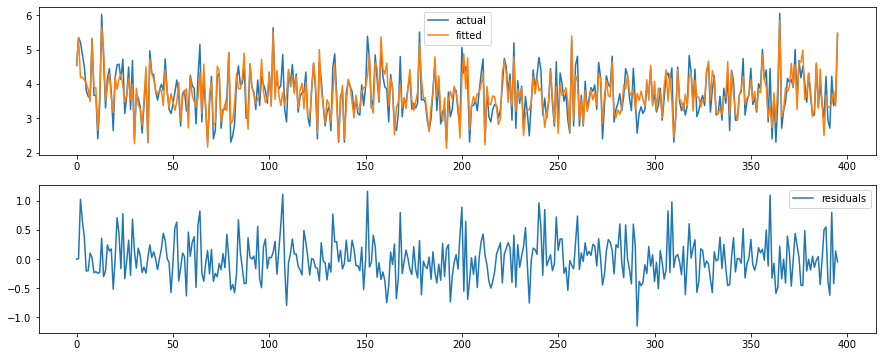

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,6))

c.plot(y = 'actual', ax = ax1) 
c.plot(y = 'fitted', ax = ax1)

c.plot(y = 'residuals', ax = ax2)
plt.show()

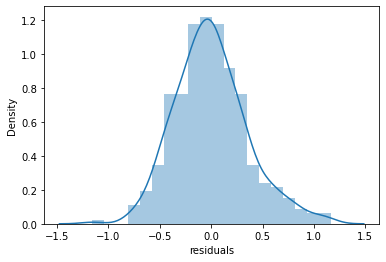

In [ ]:
#fig, ax = plt.subplots()
fig = plt.figure()
sns.distplot(c.residuals) 
plt.show()

In [ ]:
results.params

const         2.211057
employ        0.028391
cardspent     0.134348
pets         -0.007412
debtinc      -0.323812
creddebt      0.589204
ed            0.030087
age           0.005002
cardtenure    0.004388
union         0.063398
retire       -1.087428
homeown       0.129759
carbuy        0.065760
vote          0.051646
churn         0.074958
dtype: float64

In [ ]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': results.params, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

,imp,col
retire,-1.087428,retire
debtinc,-0.323812,debtinc
pets,-0.007412,pets
cardtenure,0.004388,cardtenure
age,0.005002,age
employ,0.028391,employ
ed,0.030087,ed
vote,0.051646,vote
union,0.063398,union
carbuy,0.065760,carbuy


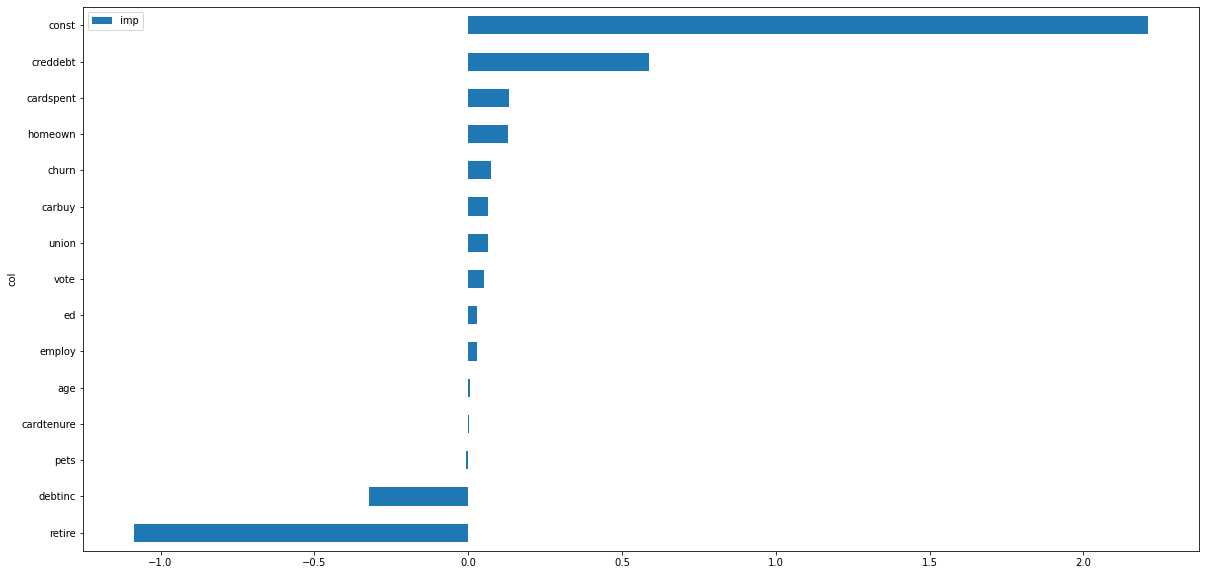

In [ ]:
feature_importance(model_1, X_train_c)

# Actual vs Predicted

In [ ]:
#for text, split between x and y
X_test = df_test.loc[:, df_test.columns != 'incom']
y_test = df_test.loc[:, df_test.columns == 'incom']

In [ ]:
X_train_c.columns

Index(['const', 'employ', 'cardspent', 'pets', 'debtinc', 'creddebt', 'ed',
       'age', 'cardtenure', 'union', 'retire', 'homeown', 'carbuy', 'vote',
       'churn'],
      dtype='object')

In [ ]:
cols_to_keep = ['const', 'employ', 'cardspent', 'pets', 'debtinc', 'creddebt', 'ed',
       'age', 'cardtenure', 'union', 'retire', 'homeown', 'carbuy', 'vote',
       'churn']

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test = X_test[cols_to_keep] 

#### apply same transformations to the test set 

In [ ]:
numerical_columns = X_test.loc[:, ~X_test.columns.isin(['gender','union','retire','default','marital','homeown','carbuy','polparty','vote','cardfee','active','churn'])].select_dtypes(include=['int', 'float']).columns
sk = X_test[numerical_columns].apply(lambda x: stats.skew(x.dropna())).to_frame('Fisher-Pearson Coef')
skw_test_cols = list(sk[abs(sk['Fisher-Pearson Coef']) > 0.5].index)
sk[abs(sk['Fisher-Pearson Coef']) > 0.5]

,Fisher-Pearson Coef
cardspent,1.635643
debtinc,0.555184
creddebt,3.341943


In [ ]:
lmbda = 0.0
X_test[skw_test_cols] = X_test[numerical_columns].loc[:, X_test[numerical_columns].columns.isin(skw_test_cols)].apply(lambda x: stats.boxcox(1+x, lmbda=lmbda))

In [ ]:
# removed skewness, before and after
sk['Fisher-Pearson Coef (After)'] = X_test[numerical_columns].apply(lambda x: stats.skew(x))
sk[sk.index.isin(skw_test_cols)]

,Fisher-Pearson Coef,Fisher-Pearson Coef (After)
cardspent,1.635643,0.087492
debtinc,0.555184,-0.783628
creddebt,3.341943,0.926097


In [ ]:
len(X_test)

99

In [ ]:
y_newpred =  results.predict(X_test) # predict out of sample

In [ ]:
y_newpred = pd.DataFrame(y_newpred)

In [ ]:
y_newpred = np.exp(y_newpred)

In [ ]:
diff = y_test['incom']-y_newpred[0]

### Actual vs Predicted >> Result

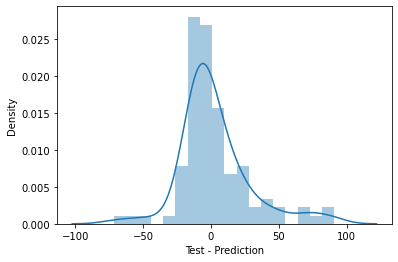

In [ ]:
sns.distplot(y_test['incom']-y_newpred[0], axlabel="Test - Prediction")
plt.show()

In [ ]:
# study this function!

In [ ]:
n_fold = 4

def rmseModel(m):
    kf = KFold(n_splits=n_fold, random_state=0, shuffle=True).get_n_splits()
    rmse = np.sqrt(-cross_val_score(m, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse